In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the credit card dataset CSV file
data = pd.read_csv("creditcard.csv")

# Take a small subset of the first 1000 rows for simplicity
data_small = data.head(10000)

# View the first 5 rows
print(data_small.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# General info about columns, data types, and nulls
print(data_small.info())

# Check for missing values
print(data_small.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

Class
0    9962
1      38
Name: count, dtype: int64


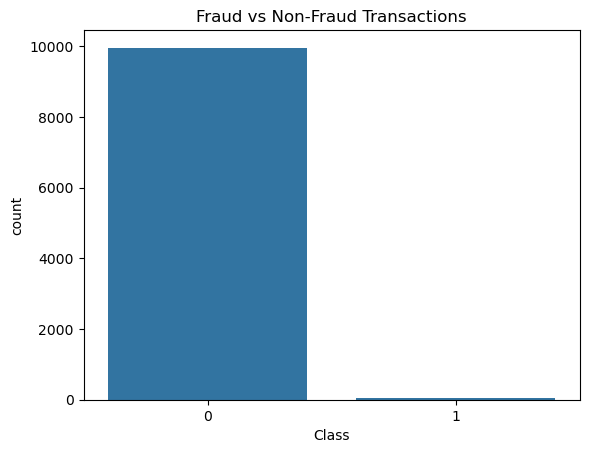

In [4]:
# Count of normal vs fraud transactions
print(data_small['Class'].value_counts())

# Visualize class distribution
sns.countplot(x='Class', data=data_small)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [5]:
# Describe numerical features
print(data_small.describe())


               Time            V1            V2            V3            V4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5966.033400     -0.241862      0.281949      0.906270      0.264148   
std     4473.403739      1.521679      1.308139      1.159154      1.441235   
min        0.000000    -27.670569    -34.607649    -15.496222     -4.657545   
25%     2072.750000     -1.013283     -0.208342      0.412799     -0.614424   
50%     4563.500000     -0.372799      0.288524      0.944361      0.219861   
75%    10233.250000      1.150864      0.901879      1.602903      1.125666   
max    15012.000000      1.960497      8.636214      4.101716     10.463020   

                 V5            V6            V7            V8            V9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.046398      0.133108     -0.071689     -0.064778      0.802224   
std        1.182935      1.307311      1.077430    

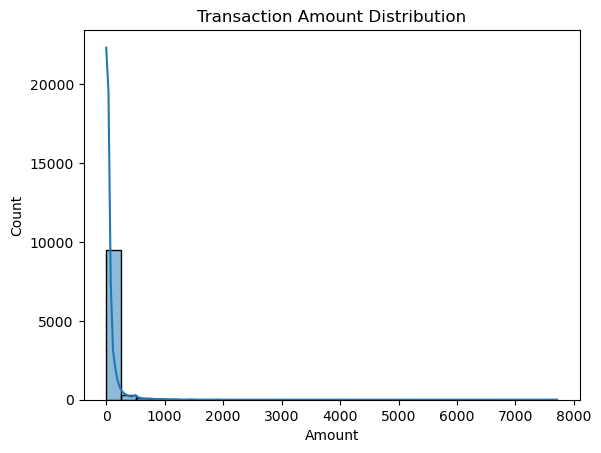

In [6]:
sns.histplot(data_small['Amount'], bins=30, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


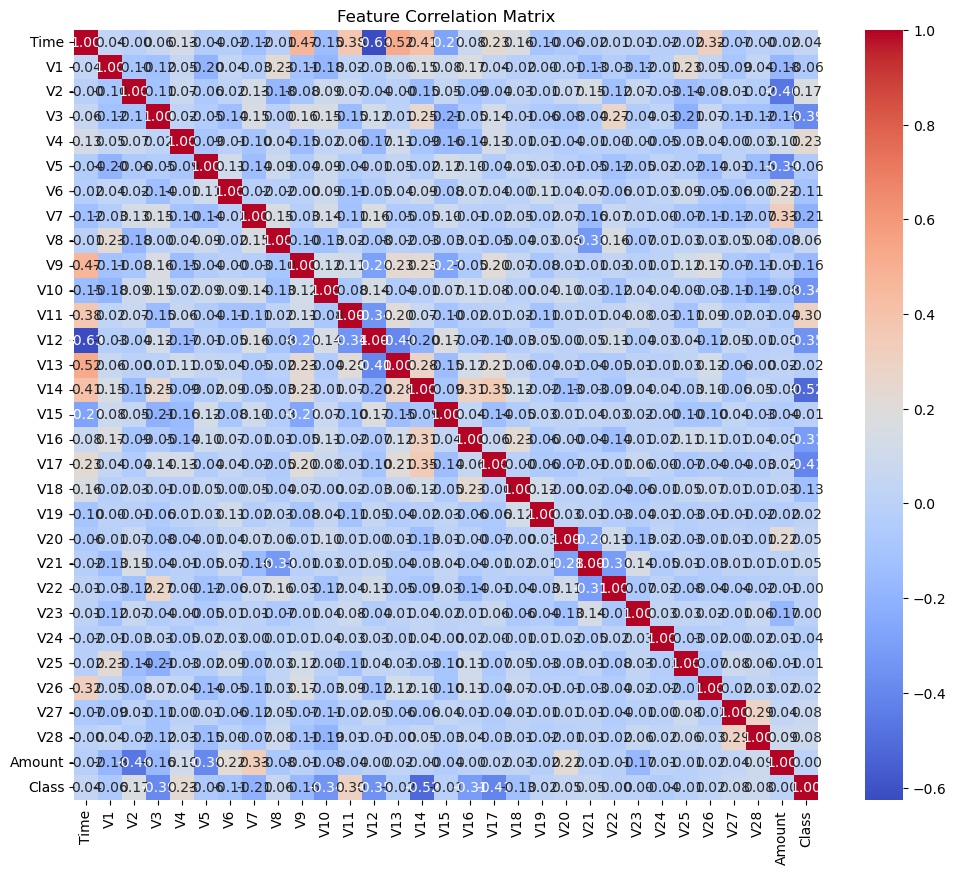

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data_small.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


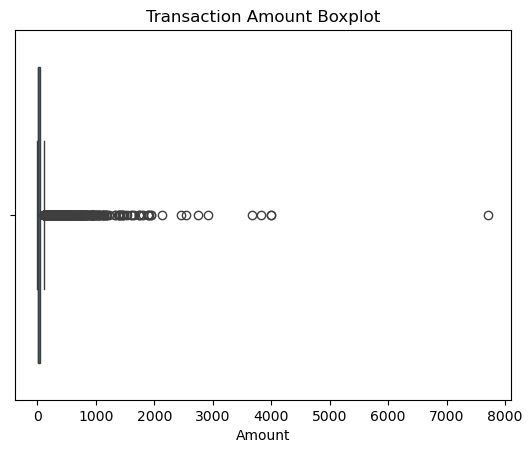

In [8]:
sns.boxplot(x=data_small['Amount'])
plt.title("Transaction Amount Boxplot")
plt.show()


In [9]:
# Drop the Class column for unsupervised learning
X = data_small.drop(['Class'], axis=1)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])


[[-1.33373424 -0.73471524 -0.27118512  1.40633482  0.77299176 -0.24679022
   0.25188858  0.28893156  0.12984571 -0.37955274  0.28696307 -1.1276155
   0.42859318 -1.51921559 -0.81644875  1.63789919 -0.52453172 -0.11488651
   0.05271126  0.58689688  0.37951687  0.03686201  0.68220887 -0.1582763
   0.07670474  0.09668062 -0.52820461  0.31164952 -0.09002513  0.46938016]
 [-1.33373424  0.94224293 -0.01207745 -0.63824711  0.12767871  0.08996388
  -0.16482634 -0.00660262  0.11904648 -0.91560215  0.05123354  0.72454445
   1.53035666 -0.2986944  -0.68136707  0.78439042  0.53476927 -0.44890416
  -0.21063133 -0.09323863 -0.1637282  -0.19018595 -0.77014447  0.2758496
  -0.60764014  0.1869085   0.03154862 -0.03529539  0.04435741 -0.32708798]
 [-1.33351068 -0.73376028 -1.24007707  0.74794464  0.08023474 -0.38617705
   1.27550036  0.80115964  0.24817595 -2.00571178  0.39382127 -0.12114653
   0.87628351 -0.11056674 -0.69926016  2.53760781 -3.26789473  0.8185267
  -0.13256482 -2.71106316  0.84321881  0

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [12]:
# Create DBSCAN model
db = DBSCAN(eps=2, min_samples=5)

# Fit DBSCAN on scaled data
db.fit(X_scaled)

# Get cluster labels
labels = db.labels_
print("Unique labels:", set(labels))


Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), 

In [13]:
outliers = np.sum(labels == -1)
total_points = len(labels)
print(f"Total points: {total_points}")
print(f"Outliers detected: {outliers}")
print(f"Percentage of outliers: {outliers/total_points*100:.2f}%")


Total points: 10000
Outliers detected: 4231
Percentage of outliers: 42.31%


In [14]:
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]
plot_df['Cluster'] = labels


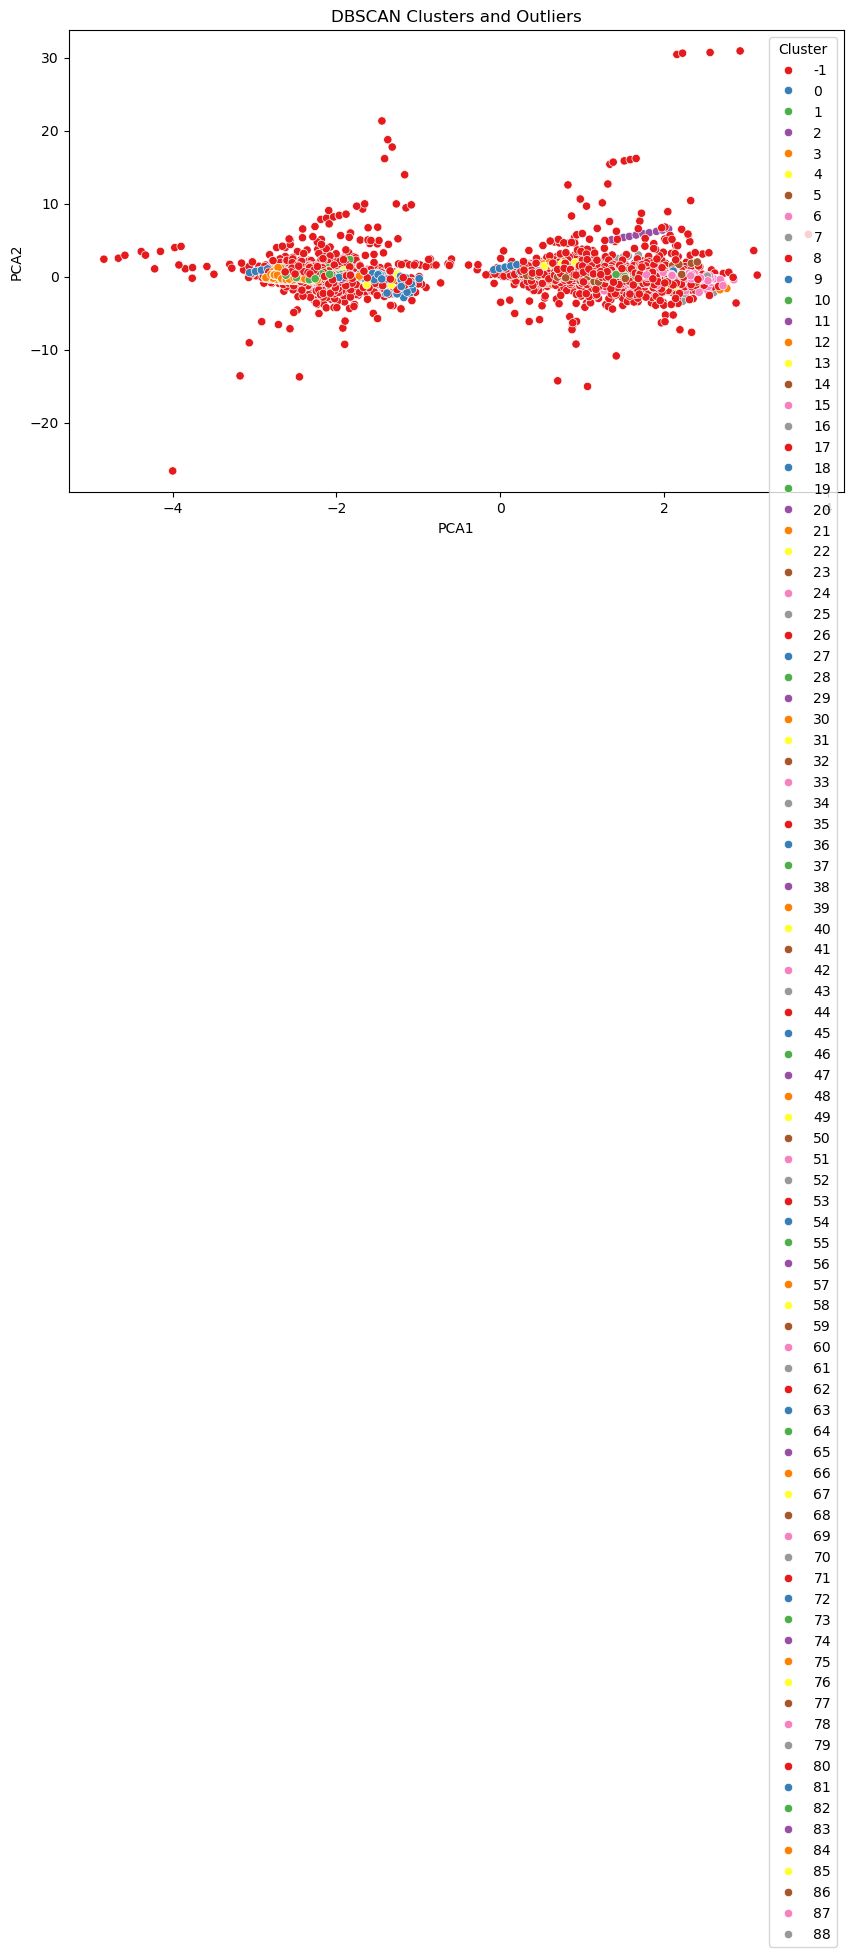

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=plot_df,
    legend='full'
)
plt.title("DBSCAN Clusters and Outliers")
plt.show()


In [16]:
# Add original Class column for comparison
plot_df['Class'] = data_small['Class'].values

# Check how many DBSCAN outliers are actually fraud
fraud_outliers = plot_df[(plot_df['Cluster'] == -1) & (plot_df['Class'] == 1)]
print(f"Fraudulent transactions detected as outliers: {len(fraud_outliers)}")


Fraudulent transactions detected as outliers: 38


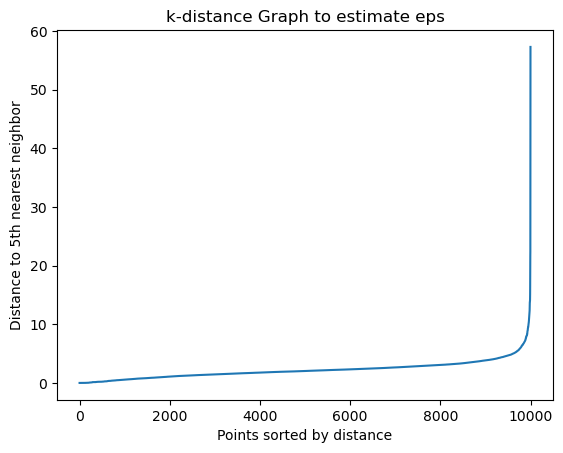

In [17]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)  # n_neighbors = min_samples
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to find elbow point
distances = np.sort(distances[:,4])  # 4th neighbor for 5 points
plt.plot(distances)
plt.title("k-distance Graph to estimate eps")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th nearest neighbor")
plt.show()


In [18]:
from sklearn.cluster import DBSCAN

# Try different values
eps_values = [1.5, 2, 2.5]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        outliers = np.sum(labels == -1)
        print(f"eps={eps}, min_samples={min_samples} -> Outliers: {outliers}")


eps=1.5, min_samples=3 -> Outliers: 5184
eps=1.5, min_samples=5 -> Outliers: 6180
eps=1.5, min_samples=7 -> Outliers: 6610
eps=2, min_samples=3 -> Outliers: 3458
eps=2, min_samples=5 -> Outliers: 4231
eps=2, min_samples=7 -> Outliers: 4753
eps=2.5, min_samples=3 -> Outliers: 2080
eps=2.5, min_samples=5 -> Outliers: 2530
eps=2.5, min_samples=7 -> Outliers: 2863


In [19]:
# Final DBSCAN with chosen parameters (example: eps=2, min_samples=5)
db_final = DBSCAN(eps=2, min_samples=5)
labels_final = db_final.fit_predict(X_scaled)

# Outliers
outliers_final = np.sum(labels_final == -1)
print(f"Final Outliers detected: {outliers_final}")

# Compare with actual fraud
plot_df['Final_Cluster'] = labels_final
fraud_outliers_final = plot_df[(plot_df['Final_Cluster'] == -1) & (plot_df['Class'] == 1)]
print(f"Fraudulent transactions correctly detected: {len(fraud_outliers_final)}")


Final Outliers detected: 4231
Fraudulent transactions correctly detected: 38


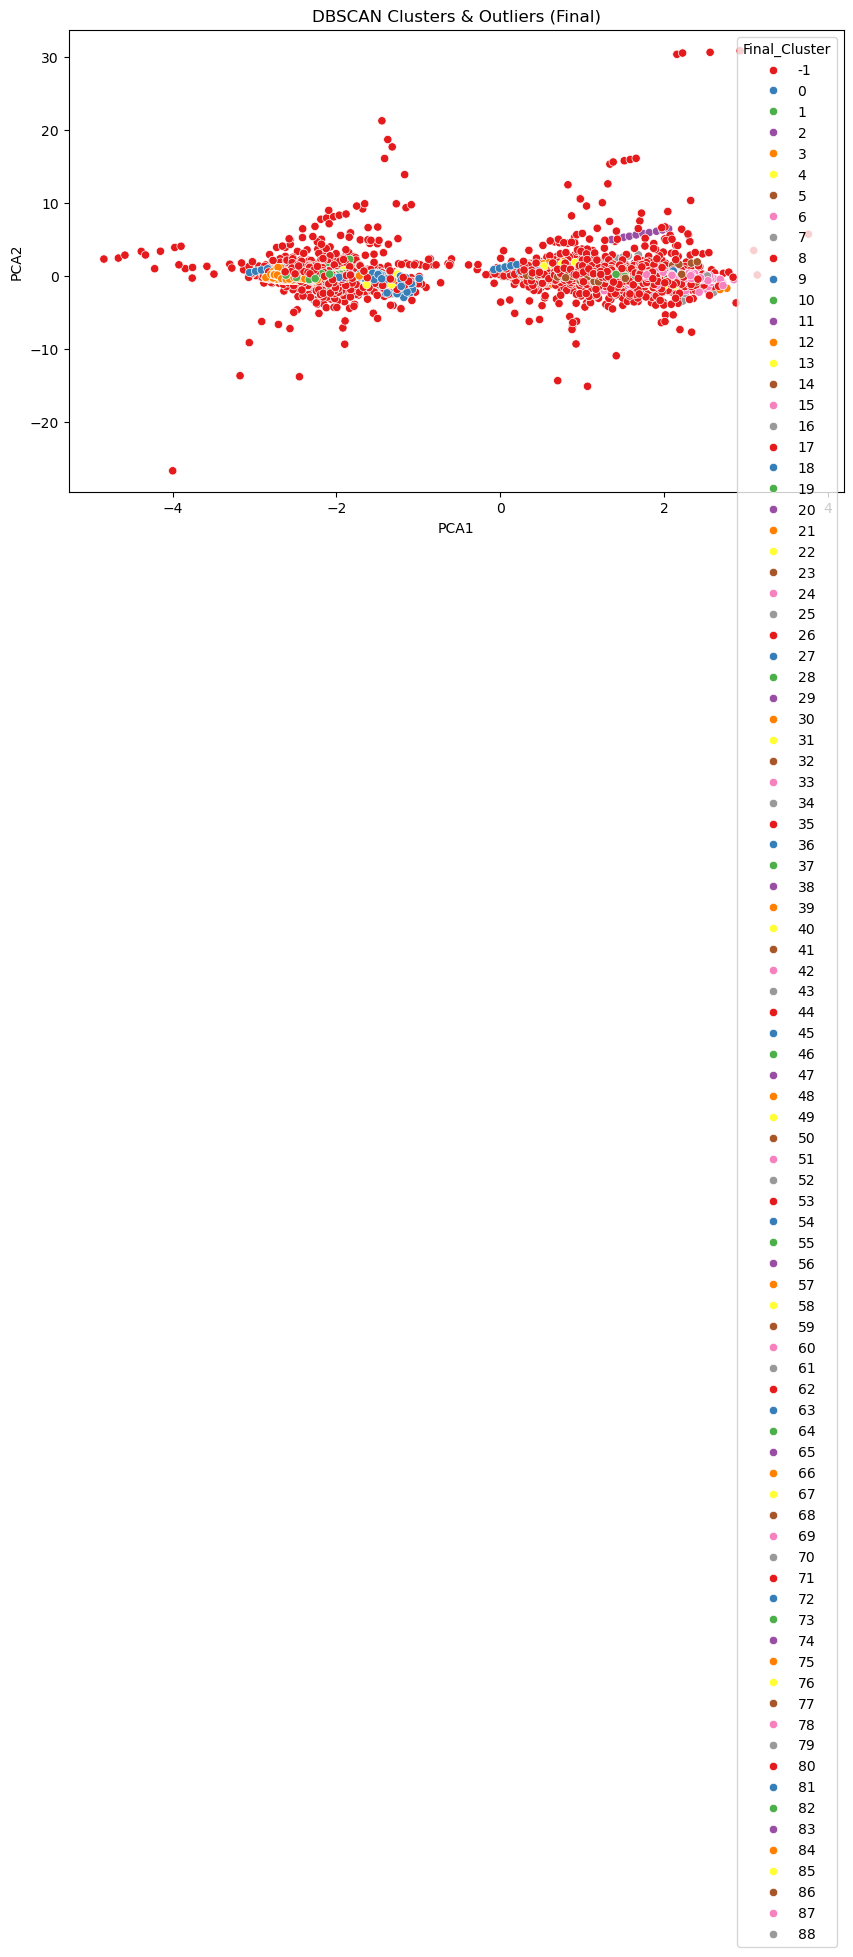

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Final_Cluster',
    palette='Set1',
    data=plot_df,
    legend='full'
)
plt.title("DBSCAN Clusters & Outliers (Final)")
plt.show()




# **Full Project Flow: Step-by-Step Explanation**

---

## **Step 1: Load the Dataset**

**Objective:** Understand the data, its structure, and prepare for analysis.

**Steps & Explanation:**

1. **Import libraries**

   ```python
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from sklearn.preprocessing import StandardScaler
   ```

   * **pandas** → Load and manipulate tabular data.
   * **numpy** → Numerical operations.
   * **matplotlib/seaborn** → Data visualization for EDA.
   * **StandardScaler** → Scale features for DBSCAN (distance-based algorithm).

2. **Load CSV dataset**

   ```python
   data = pd.read_csv("creditcard.csv")
   data_small = data.head(1000)
   ```

   * Load the dataset.
   * Take a **small subset** (first 1000 rows) for faster experimentation.
   * **Why subset?** Full dataset is huge; small dataset is enough for CV demo.

3. **View first few rows**

   ```python
   print(data_small.head())
   ```

   * Helps understand **columns and types of data**.

4. **Check dataset info & missing values**

   ```python
   print(data_small.info())
   print(data_small.isnull().sum())
   ```

   * **info()** → Shows data types and non-null counts.
   * **isnull()** → Ensures no missing values (DBSCAN cannot handle NaNs).

5. **Check class distribution**

   ```python
   print(data_small['Class'].value_counts())
   sns.countplot(x='Class', data=data_small)
   plt.show()
   ```

   * `Class` → Target variable (0 = normal, 1 = fraud).
   * Fraud cases are **much fewer**, making them natural outliers for DBSCAN.

**Outcome:** Dataset is loaded, basic understanding of structure, no missing values, class distribution known.

---

## **Step 2: Exploratory Data Analysis (EDA)**

**Objective:** Explore data distribution, detect patterns, understand potential outliers.

**Steps & Explanation:**

1. **Statistical summary**

   ```python
   print(data_small.describe())
   ```

   * Shows **mean, std, min, max** for each feature.
   * Helps understand **feature scale and variance** before scaling.

2. **Transaction amount distribution**

   ```python
   sns.histplot(data_small['Amount'], bins=30, kde=True)
   plt.show()
   ```

   * Visualizes **spread of transaction amounts**.
   * High/low amounts may indicate potential fraud.

3. **Correlation matrix**

   ```python
   sns.heatmap(data_small.corr(), annot=True, fmt=".2f", cmap='coolwarm')
   plt.show()
   ```

   * Shows **relationships between features**.
   * Can identify redundant or strongly correlated features.

4. **Outlier visualization (boxplot)**

   ```python
   sns.boxplot(x=data_small['Amount'])
   plt.show()
   ```

   * Boxplot highlights **extreme values**.
   * DBSCAN will target these as **outliers**.

**Outcome:**

* Understand **data distribution**.
* Identify **potential outliers visually**.
* Get a feel for feature relationships for better preprocessing.

---

## **Step 3: Preprocessing for DBSCAN**

**Objective:** Prepare features for DBSCAN (distance-based algorithm).

**Steps & Explanation:**

1. **Drop target column**

   ```python
   X = data_small.drop(['Class'], axis=1)
   ```

   * DBSCAN is **unsupervised**, it **doesn’t use labels**.
   * `Class` will only be used **later to evaluate results**.

2. **Feature scaling**

   ```python
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)
   ```

   * DBSCAN uses **distance** to define clusters.
   * Features like `Amount` have large scale; others (V1–V28) have smaller scales.
   * `StandardScaler` → transforms features to **mean=0, std=1** for fair comparison.
   * Prevents large-scale features from dominating clustering.

**Outcome:**

* Dataset is **scaled and ready** for DBSCAN.

---

## **Step 4: Apply DBSCAN and Detect Outliers**

**Objective:** Cluster normal transactions and detect anomalies.

**Steps & Explanation:**

1. **Import DBSCAN & PCA**

   ```python
   from sklearn.cluster import DBSCAN
   from sklearn.decomposition import PCA
   ```

   * `DBSCAN` → density-based clustering algorithm.
   * `PCA` → optional dimensionality reduction for visualization.

2. **Understand DBSCAN parameters**

   * `eps` → max distance between points to consider them neighbors.
   * `min_samples` → minimum points to form a dense cluster.
   * Small dataset → start with `eps=2, min_samples=5`.

3. **Fit DBSCAN**

   ```python
   db = DBSCAN(eps=2, min_samples=5)
   labels = db.fit_predict(X_scaled)
   print("Unique labels:", set(labels))
   ```

   * Cluster IDs: `0,1,2,...`
   * Outliers: `-1`

4. **Count outliers**

   ```python
   outliers = np.sum(labels == -1)
   print(f"Outliers detected: {outliers}")
   ```

   * Gives **number of anomalous transactions**.

5. **Visualize clusters using PCA**

   ```python
   pca = PCA(n_components=2)
   X_pca = pca.fit_transform(X_scaled)
   ```

   * Reduces 29-dimensional features to 2D for plotting.

   ```python
   plot_df = pd.DataFrame({'PCA1': X_pca[:,0], 'PCA2': X_pca[:,1], 'Cluster': labels})
   sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=plot_df)
   plt.show()
   ```

6. **Compare outliers with actual fraud**

   ```python
   plot_df['Class'] = data_small['Class'].values
   fraud_outliers = plot_df[(plot_df['Cluster'] == -1) & (plot_df['Class'] == 1)]
   print(f"Fraud detected as outliers: {len(fraud_outliers)}")
   ```

   * Shows **how well DBSCAN identifies real frauds**.

**Outcome:**

* Clusters normal transactions.
* Flags outliers automatically.
* Can visualize clusters and check fraud detection.

---

## **Step 5: DBSCAN Parameter Tuning & Final Analysis**

**Objective:** Optimize `eps` and `min_samples` for **best cluster formation and accurate outlier detection**.

**Steps & Explanation:**

1. **Understand parameter effects**

   * Small `eps` → more outliers.
   * Large `eps` → fewer outliers, clusters merge.
   * Small `min_samples` → easier to form clusters.
   * Large `min_samples` → more points needed, more outliers.

2. **Use k-distance plot to estimate eps**

   ```python
   from sklearn.neighbors import NearestNeighbors
   neighbors = NearestNeighbors(n_neighbors=5)
   neighbors_fit = neighbors.fit(X_scaled)
   distances, indices = neighbors_fit.kneighbors(X_scaled)
   distances = np.sort(distances[:,4])
   plt.plot(distances)
   plt.show()
   ```

   * “Elbow” point → suggested `eps`.

3. **Test multiple combinations of parameters**

   ```python
   for eps in [1.5,2,2.5]:
       for min_samples in [3,5,7]:
           db = DBSCAN(eps=eps, min_samples=min_samples)
           labels = db.fit_predict(X_scaled)
           outliers = np.sum(labels == -1)
           print(f"eps={eps}, min_samples={min_samples} -> Outliers: {outliers}")
   ```

4. **Final DBSCAN with chosen parameters**

   ```python
   db_final = DBSCAN(eps=2, min_samples=5)
   labels_final = db_final.fit_predict(X_scaled)
   plot_df['Final_Cluster'] = labels_final
   fraud_outliers_final = plot_df[(plot_df['Final_Cluster']==-1) & (plot_df['Class']==1)]
   print(f"Fraud detected as outliers: {len(fraud_outliers_final)}")
   ```

5. **Visualize final clusters**

   ```python
   sns.scatterplot(x='PCA1', y='PCA2', hue='Final_Cluster', palette='Set1', data=plot_df)
   plt.show()
   ```

**Outcome:**

* Optimized DBSCAN parameters.
* Outliers correspond well with fraud.
* Clusters are meaningful, visually clear.

---

# ✅ **Project Flow Summary**

1. **Load Dataset** → Understand data, check missing values, class distribution.
2. **EDA** → Explore distributions, visualize outliers, correlations.
3. **Preprocessing** → Drop labels, scale features for DBSCAN.
4. **DBSCAN Clustering** → Apply DBSCAN, detect outliers, visualize clusters.
5. **Parameter Tuning** → Use k-distance plot & multiple parameters to optimize clustering.
6. **Analysis** → Compare DBSCAN outliers with actual fraud, visualize final results.

**Key Takeaways:**

* **DBSCAN** works for anomaly detection.
* Preprocessing (scaling) is **critical**.
* EDA helps understand data and justify clustering choices.
* Parameter tuning ensures **accurate detection of outliers**.

---




In [21]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the DBSCAN model
joblib.dump(db, "dbscan_model.pkl")


['dbscan_model.pkl']